In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
import sys
path_utils = 'C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/tweet_utils'
sys.path.append(path_utils)
import utils
warnings.filterwarnings("ignore")

In [2]:
path = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Italian/files/tweets/"

In [3]:
tweets = pd.read_csv(path + "tweets_without_useless_and_score (5.0).csv",
                         lineterminator="\n", low_memory=False, encoding="utf-8")


In [4]:
tweets = tweets[~tweets["urls"].str.contains("twitter.com")]
tweets

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,media,user_tweets_count,user_friends_count,user_followers_count,domain,number_of_urls,LOW,HIGH,UNKW,SOCIAL
0,1221738978585563136,1221738978585563136,Mon Jan 27 10:17:25 +0000 2020,166708308,Asgard_Hydra,False,Wed Jul 14 20:31:11 +0000 2010,Ricercatori a lavoro per produrre vaccino cont...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,[],NaN,NaN,NaN,['tech.everyeye.it'],1,0,0,1,0
1,1221737274108469248,1221737274108469248,Mon Jan 27 10:10:39 +0000 2020,1622970242,Intuitizioni,False,Fri Jul 26 13:32:45 +0000 2013,"https://t.co/oNhi3KHwgx\n \n""la fondazione del...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,[],NaN,NaN,NaN,['lacrunadellago.net'],1,1,0,0,0
2,1221739674022162432,1221739674022162432,Mon Jan 27 10:20:11 +0000 2020,823552947581812736,Aemmedi,False,Mon Jan 23 15:28:18 +0000 2017,"#Colesterolo, al via i test per il vaccino in ...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,[],NaN,NaN,NaN,['ilmessaggero.it'],1,0,1,0,0
3,1221737915182649344,1221737915182649344,Mon Jan 27 10:13:12 +0000 2020,799698834318360576,tiziRMA,False,Fri Nov 18 19:40:34 +0000 2016,"https://t.co/oNhi3KHwgx\n \n""la fondazione del...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,[],NaN,NaN,NaN,['lacrunadellago.net'],1,1,0,0,0
4,1221724185380171776,1221724185380171776,Mon Jan 27 09:18:38 +0000 2020,906232083324043269,Toba_60,False,Fri Sep 08 19:05:40 +0000 2017,Vaccini: I Genitori Vengono Manipolati? https:...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,[],NaN,NaN,NaN,['toba60.com'],1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634393,1394609978980319232,1394609978980319232,Tue May 18 11:05:04 +0000 2021,2197175103,grecale66,False,Tue Nov 26 18:05:12 +0000 2013,"Vaccino Covid, nuovo errore di somministrazion...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,[],116242.0,2382.0,1873.0,['imolaoggi.it'],1,1,0,0,0
634394,1394609850089345025,1394609850089345025,Tue May 18 11:04:33 +0000 2021,71210454,tuttoggi,False,Thu Sep 03 09:01:38 +0000 2009,Anche i carabinieri del Nas potrebbero interes...,"<a href=""https://www.postpickr.com"" rel=""nofol...",NaN,...,[],93104.0,228.0,3744.0,['tuttoggi.info'],1,0,0,1,0
634395,1394609946881298432,1394609946881298432,Tue May 18 11:04:56 +0000 2021,2926782875,Mustapha1508,False,Wed Dec 17 10:59:26 +0000 2014,"Vaccino, dopo il caso della 23enne un altro er...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,[],50672.0,5003.0,3923.0,['csera.it'],1,0,1,0,0
634396,1394610031262306304,1394610031262306304,Tue May 18 11:05:16 +0000 2021,4309630395,Ileana0406,False,Sat Nov 28 18:18:40 +0000 2015,"Vaccini, nuovo errore di somministrazione in T...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,[],21105.0,1130.0,833.0,['tgcom24.mediaset.it'],1,0,1,0,0


In [5]:
dates = [utils.process_datetime(i) for i in tqdm(tweets["created_at"])]

In [6]:
tweets["dates"] = dates
tweets['date_tweets']= tweets.groupby(['dates'])['created_at'].transform('size')
tweets_for_plot = tweets.drop_duplicates(subset='dates')
tweets_for_plot.sort_values(by=["dates"], ascending=True, inplace=True)

In [7]:
labels =  []
for i in tweets_for_plot["created_at"]:
    x = i.split(" ")
    month = x[1]
    day = x[2]
    year = x[5][2:]
    value = day + " " + month + " '" + year
    labels.append(value)

In [8]:
# tweets_for_plot[["dates","date_tweets"]]
tweets_for_plot['7day_rolling_avg'] = tweets_for_plot.date_tweets.rolling(14).mean()

Text(0, 0.5, 'Tweets')

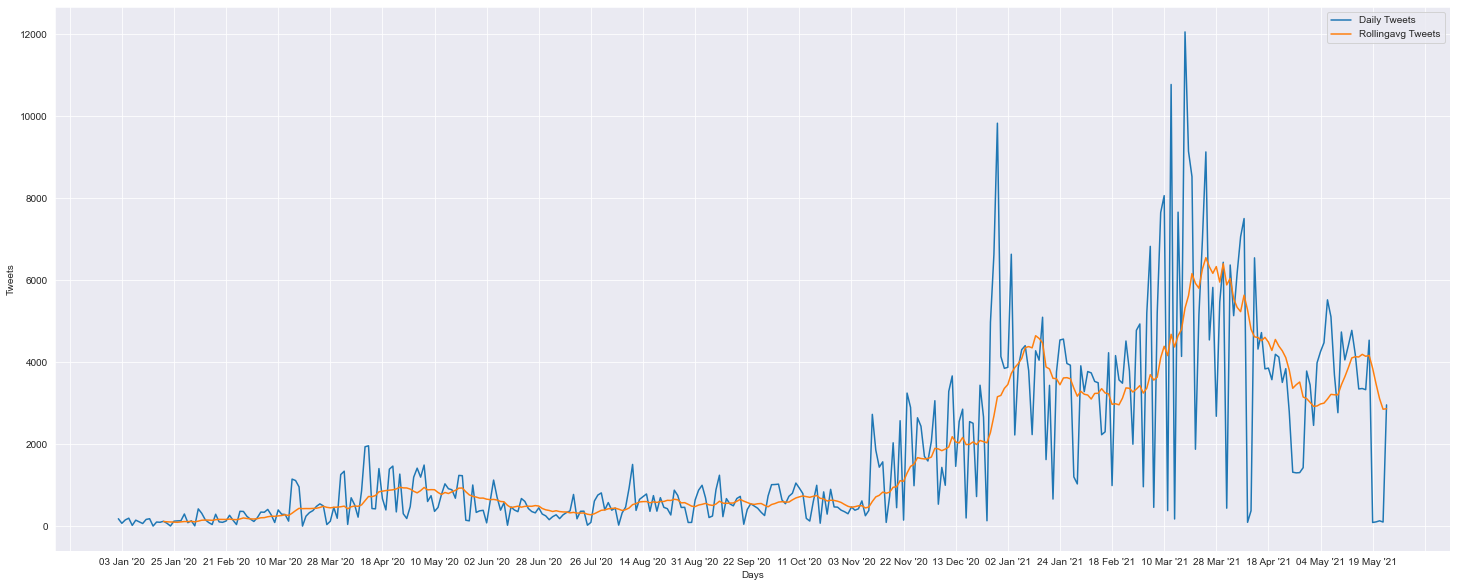

In [9]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(25, 10))
sns.lineplot( x = 'dates',
             y = 'date_tweets',
             data = tweets_for_plot,
             label = 'Daily Tweets')
sns.lineplot(x = 'dates',
             y = '7day_rolling_avg',
             data = tweets_for_plot,
             label = 'Rollingavg Tweets')

plt.xlabel('Days')

pos = list(tweets_for_plot["dates"])
lab = labels
plt.xticks(pos, lab)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.ylabel('Tweets')

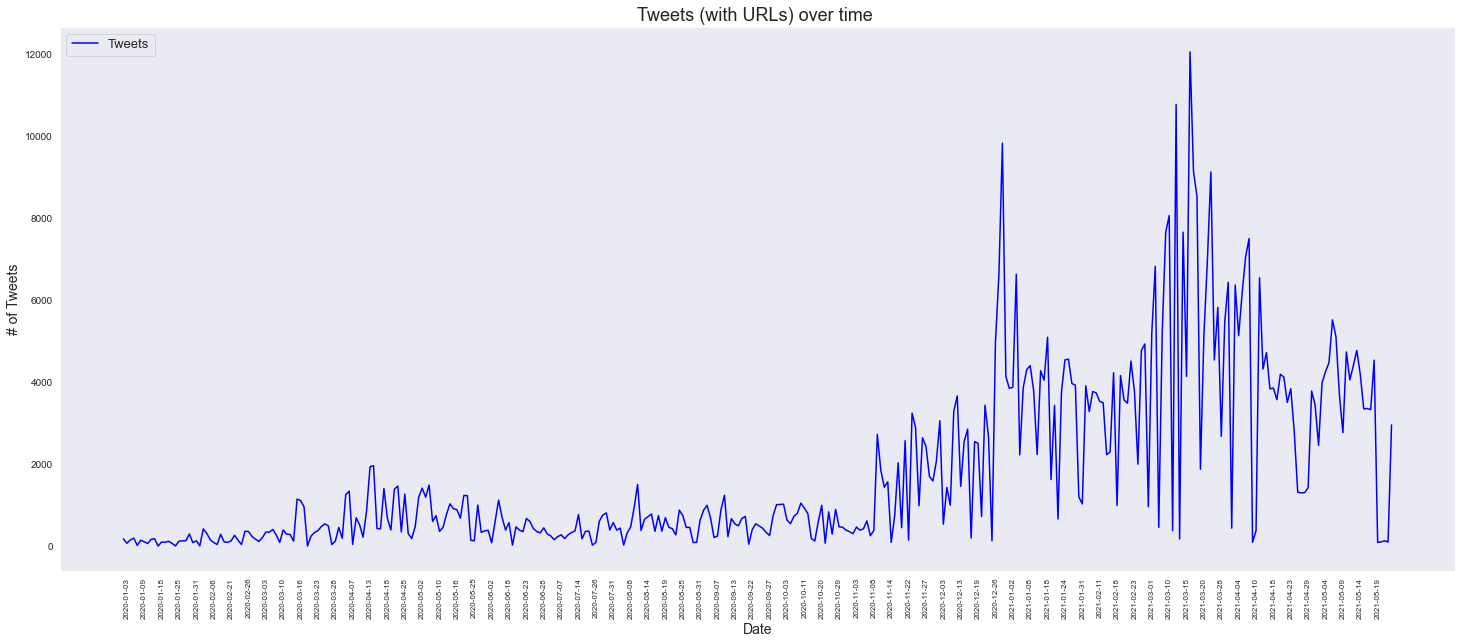

In [10]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Tweets (with URLs) over time ', fontsize=18)
tweets_for_plot.sort_values(by=["dates"], ascending=True, inplace=True)

ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('# of Tweets', fontsize=14)

plt.plot(tweets_for_plot['dates'], tweets_for_plot['date_tweets'], c='b', label='Tweets')
# set monthly locator
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
# set formatter
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.xticks(rotation='vertical', fontsize = 8) 
plt.legend(loc='upper left', fontsize=13);
plt.grid()
plt.show()

#### Mesi sul totale

In [11]:
low = tweets[tweets["LOW"]>0]
low['date_tweets']= low.groupby(['dates'])['created_at'].transform('size')
low_for_plot = low.drop_duplicates(subset='dates')

In [12]:
print(round(low["SOCIAL"].sum()/low["number_of_urls"].sum()*100,2),"% social")
print(round(low["UNKW"].sum()/low["number_of_urls"].sum()*100,2),"% unknown")
print(round(low["HIGH"].sum()/low["number_of_urls"].sum()*100,2),"% high")
print(round(low["LOW"].sum()/low["number_of_urls"].sum()*100,2),"% low")

0.37 % social
0.75 % unknown
0.26 % high
98.62 % low


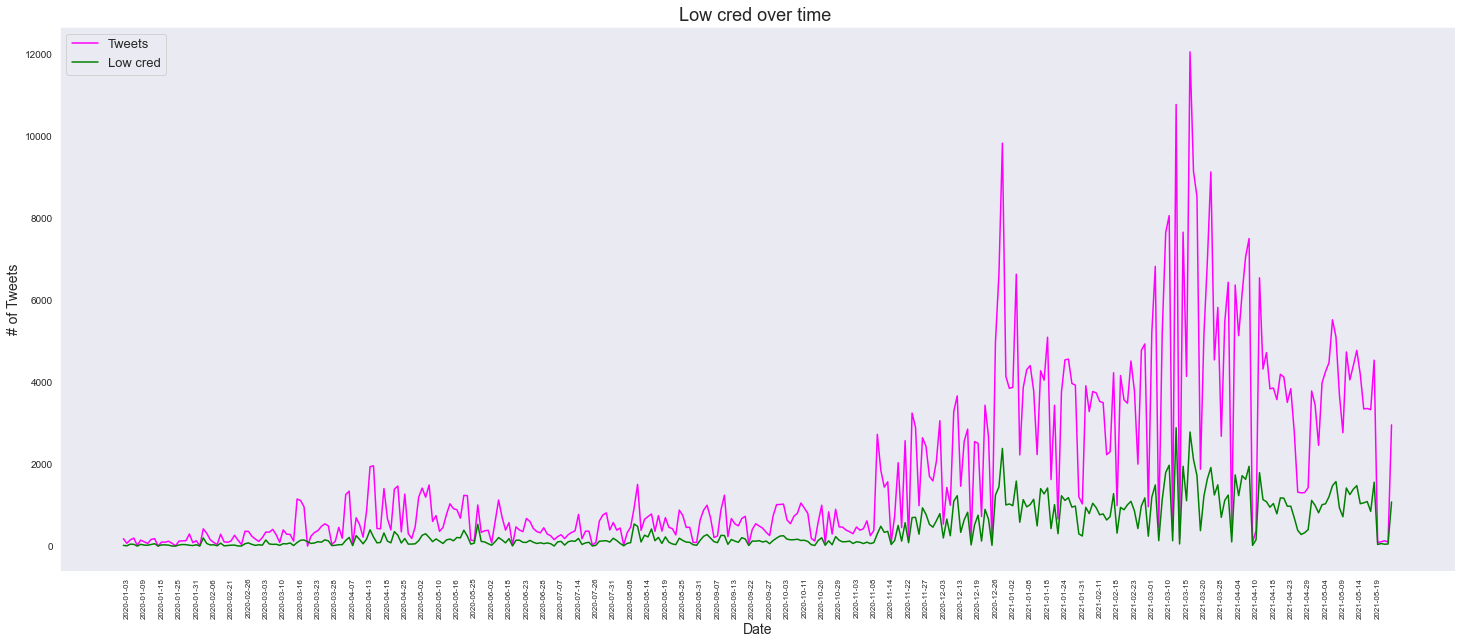

In [13]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Low cred over time ', fontsize=18)
tweets_for_plot.sort_values(by=["dates"], ascending=True, inplace=True)
low_for_plot.sort_values(by=["dates"], ascending=True, inplace=True)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('# of Tweets', fontsize=14)

# plt.plot(sorted(low['dates']), low['date_tweets'], c='b', label='Low')
plt.plot(tweets_for_plot['dates'], tweets_for_plot['date_tweets'], c='magenta', label='Tweets')
plt.plot(low_for_plot['dates'], low_for_plot['date_tweets'], c='green', label='Low cred')

# set monthly locator
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
# set formatter
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.xticks(rotation='vertical', fontsize = 8) 
plt.legend(loc='upper left', fontsize=13);
plt.grid()
plt.show()

In [14]:
good = []
bad = []
number = []
date = []
for i in tqdm(tweets["dates"].unique()):
    general = tweets[tweets["dates"]==i]
    date.append(i)
    good.append(round(general["HIGH"].sum()/general["number_of_urls"].sum()*100,2))
    bad.append(round(general["LOW"].sum()/general["number_of_urls"].sum()*100,2))
    number.append(len(general))

In [15]:
labels =  []
for i in tweets["created_at"]:
    x = i.split(" ")
    month = x[1]
    day = x[2]
    year = x[5][2:]
    value = day + " " + month + " '" + year
    labels.append(value)
labels = list(pd.Series(labels).unique())
len(labels)

366

In [16]:
df = pd.DataFrame(list(zip(number,date,bad,good, labels)), columns=["number", "date", "low", "high", "label"])
df.sort_values(by=["date"], ascending=True, inplace=True)

In [17]:
df

,number,date,low,high,label
16,181,2020-01-02,9.73,16.76,02 Jan '20
2,70,2020-01-03,11.11,33.33,03 Jan '20
5,153,2020-01-04,31.17,38.31,04 Jan '20
6,195,2020-01-05,21.46,34.63,05 Jan '20
7,19,2020-01-06,5.00,0.00,06 Jan '20
...,...,...,...,...,...
346,90,2021-05-19,43.48,18.48,19 May '21
348,105,2021-05-20,58.33,25.93,20 May '21
349,131,2021-05-21,35.61,28.03,21 May '21
350,101,2021-05-22,49.52,18.10,22 May '21


In [18]:
df['rolling_avg_low'] = df.low.rolling(14).mean()
df['rolling_avg_high'] = df.high.rolling(14).mean()
df

,number,date,low,high,label,rolling_avg_low,rolling_avg_high
16,181,2020-01-02,9.73,16.76,02 Jan '20,NaN,NaN
2,70,2020-01-03,11.11,33.33,03 Jan '20,NaN,NaN
5,153,2020-01-04,31.17,38.31,04 Jan '20,NaN,NaN
6,195,2020-01-05,21.46,34.63,05 Jan '20,NaN,NaN
7,19,2020-01-06,5.00,0.00,06 Jan '20,NaN,NaN
...,...,...,...,...,...,...,...
346,90,2021-05-19,43.48,18.48,19 May '21,29.799286,33.797857
348,105,2021-05-20,58.33,25.93,20 May '21,32.092143,32.949286
349,131,2021-05-21,35.61,28.03,21 May '21,32.471429,32.516429
350,101,2021-05-22,49.52,18.10,22 May '21,34.237143,30.878571


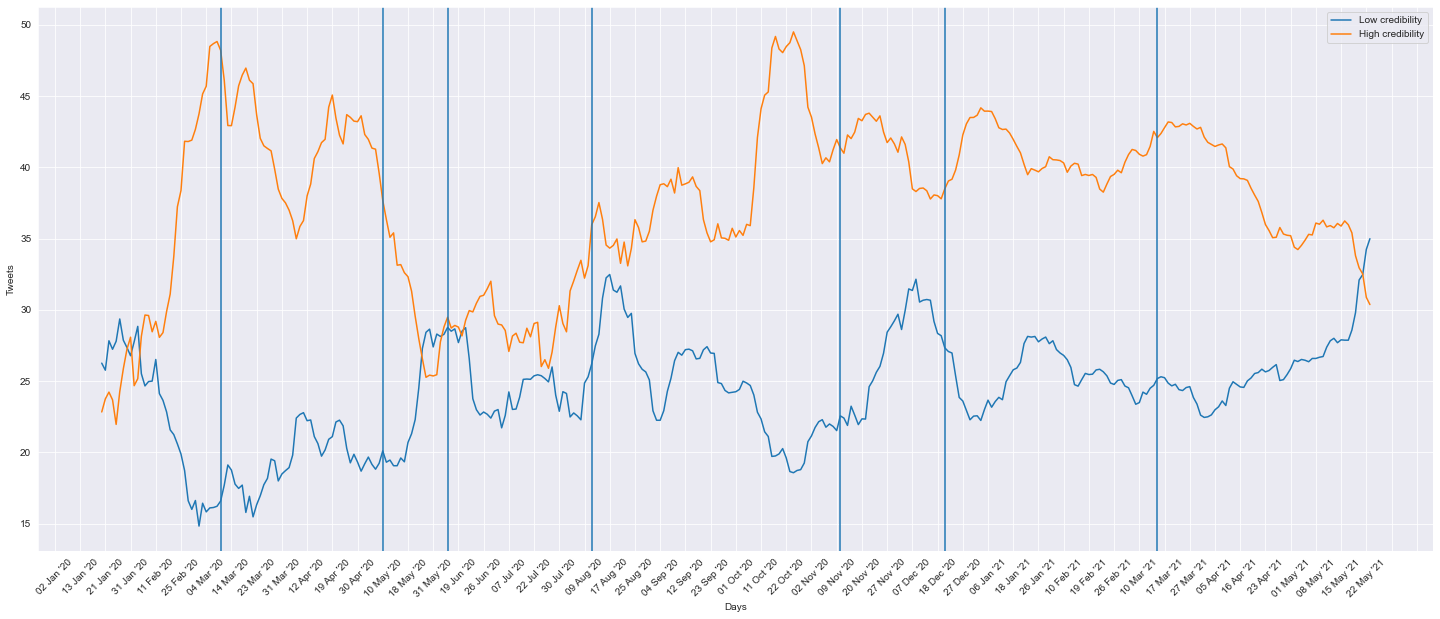

In [53]:
fig, ax = plt.subplots(figsize=(25, 10))
# sns.lineplot( x = 'date',
#              y = 'low',
#              data = df,
#              label = 'Low credibility')
sns.lineplot(x = 'date',
             y = 'rolling_avg_low',
             data = df,
             label = 'Low credibility')
# sns.lineplot( x = 'date',
#              y = 'high',
#              data = df,
#              label = 'High credibility')
sns.lineplot(x = 'date',
             y = 'rolling_avg_high',
             data = df,
             label = 'High credibility')

plt.xlabel('Days')

pos = list(df["date"])
lab = list(df["label"])
plt.xticks(pos, lab)
plt.xticks(rotation=45, fontsize = 10)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.axvline(x="2020-03-10") # lockdown (fase 1, 9)
plt.axvline(x="2020-05-10") # allentamento misure (fase 2, 4)
plt.axvline(x="2020-06-15") # convivenza (fase 3)
plt.axvline(x="2020-08-12") # nuove restrizioni (10)
plt.axvline(x="2020-11-10") # coprifuoco e zone a colori (6)
plt.axvline(x="2020-12-21") # ok aifa per vaccino e somministrazioni
plt.axvline(x="2021-03-15") # Interruzione AZ

plt.ylabel('Tweets')
plt.show()

In [32]:
lab

["02 Jan '20",
 "03 Jan '20",
 "04 Jan '20",
 "05 Jan '20",
 "06 Jan '20",
 "08 Jan '20",
 "09 Jan '20",
 "13 Jan '20",
 "14 Jan '20",
 "15 Jan '20",
 "16 Jan '20",
 "18 Jan '20",
 "19 Jan '20",
 "20 Jan '20",
 "21 Jan '20",
 "24 Jan '20",
 "25 Jan '20",
 "26 Jan '20",
 "27 Jan '20",
 "28 Jan '20",
 "30 Jan '20",
 "31 Jan '20",
 "02 Feb '20",
 "03 Feb '20",
 "04 Feb '20",
 "05 Feb '20",
 "06 Feb '20",
 "10 Feb '20",
 "11 Feb '20",
 "12 Feb '20",
 "20 Feb '20",
 "21 Feb '20",
 "22 Feb '20",
 "23 Feb '20",
 "24 Feb '20",
 "25 Feb '20",
 "26 Feb '20",
 "27 Feb '20",
 "28 Feb '20",
 "29 Feb '20",
 "01 Mar '20",
 "03 Mar '20",
 "04 Mar '20",
 "05 Mar '20",
 "06 Mar '20",
 "07 Mar '20",
 "10 Mar '20",
 "11 Mar '20",
 "12 Mar '20",
 "14 Mar '20",
 "15 Mar '20",
 "16 Mar '20",
 "17 Mar '20",
 "18 Mar '20",
 "21 Mar '20",
 "22 Mar '20",
 "23 Mar '20",
 "24 Mar '20",
 "25 Mar '20",
 "26 Mar '20",
 "27 Mar '20",
 "28 Mar '20",
 "29 Mar '20",
 "31 Mar '20",
 "02 Apr '20",
 "03 Apr '20",
 "07 Apr '

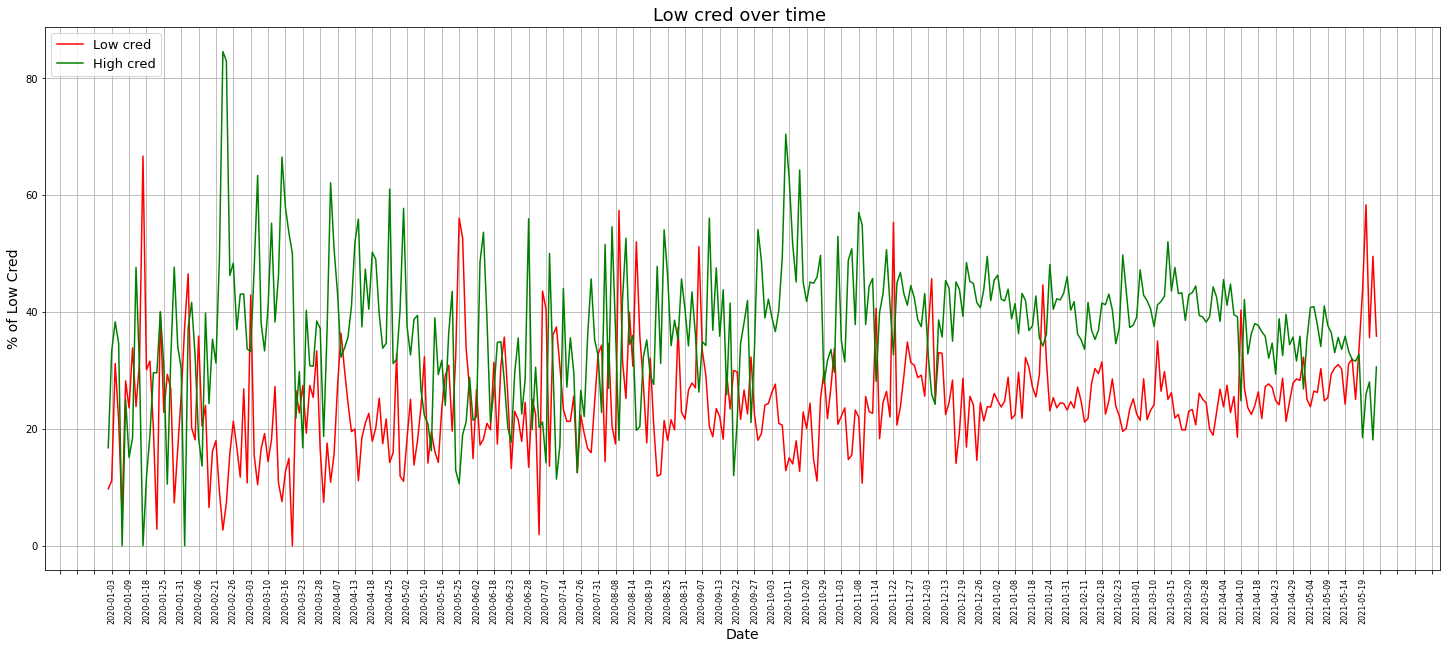

In [28]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Low and Hight credibility domains shared over time ', fontsize=18)

ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('% of Low Cred', fontsize=14)

# plt.plot(sorted(low['dates']), low['date_tweets'], c='b', label='Low')
plt.plot(df['date'], df['low'], c='red', label='Low cred')
plt.plot(df['date'], df['high'], c='green', label='High cred')


# set monthly locator
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
# set formatter
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.xticks(rotation='vertical', fontsize = 8) 
plt.legend(loc='upper left', fontsize=13);
plt.grid()
plt.show()

In [29]:
df.sort_values(by=["low"], ascending=False)

,number,date,low,high
13,3,2020-01-16,66.67,0.00
348,105,2021-05-20,58.33,25.93
226,932,2020-08-09,57.37,18.03
153,130,2020-05-25,56.06,10.61
67,148,2020-11-22,55.33,32.67
...,...,...,...,...
7,19,2020-01-06,5.00,0.00
18,70,2020-01-21,2.82,29.58
105,145,2020-02-23,2.68,84.56
202,158,2020-07-05,1.90,20.25


In [21]:
# pd.Series(tweets[(tweets["dates"]=="2020-12-04")]["domain"]).value_counts().sort_values(ascending=False)

In [20]:
# pd.Series(tweets[(tweets["dates"]=="2020-12-04")]["text"]).value_counts().sort_values(ascending=False)

# Hashtag - Media low cred

In [30]:
df_low = tweets[tweets["LOW"]/tweets["number_of_urls"]==1]

In [31]:
valore = pd.Series(df_low[df_low["hashtags"]!="[]"]["hashtags"]).value_counts().sort_values(ascending=False)

In [32]:
hashtag = list(valore.index)

In [33]:
lst = []
for valore in tqdm(hashtag):
    for i in valore.split("'text'")[1:]:
        lst.append(i.split(",")[0][3:-1])

In [35]:
pd.Series(lst).value_counts().sort_values(ascending=False)

vaccino       2799
Covid         1626
Vaccino       1374
vaccini       1286
Vaccini       1024
              ... 
TeamVox          1
Parco            1
Solomeo          1
monitorare       1
lisola           1
Length: 8855, dtype: int64

# Bad text - hashtags

In [57]:
rt_nt = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/Files/gephi/names_louvain.csv")
for i in rt_nt.itertuples():
    if "Agenzia" in i.Label:
        print(i.Label)
        print(i.Community)

Agenzia_Dire
3
AgenziaVISTA
3
AgenziaH
0
Agenzia_Ansa
3
Agenzia_Italia
3


In [62]:
merge = tweets.merge(rt_nt, left_on="user_screen_name", right_on="Label", how="left")
bad = merge[merge["Community"]==4]
good = merge[merge["Community"]==0]
giornali = merge[merge["Community"]==3]

In [63]:
bad

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,number_of_urls,LOW,HIGH,UNKW,SOCIAL,dates,date_tweets,Id,Label,Community
4,1221724185380171776,1221724185380171776,Mon Jan 27 09:18:38 +0000 2020,906232083324043269,Toba_60,False,Fri Sep 08 19:05:40 +0000 2017,Vaccini: I Genitori Vengono Manipolati? https:...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,1,1,0,0,0,2020-01-27,132,12336.0,Toba_60,4.0
5,1221718576505245696,1221718576505245696,Mon Jan 27 08:56:21 +0000 2020,906232083324043269,Toba_60,False,Fri Sep 08 19:05:40 +0000 2017,LA Russia Sostituisce i Vaccini Stanieri con Q...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,1,1,0,0,0,2020-01-27,132,12336.0,Toba_60,4.0
7,1221717982189170689,1221717982189170689,Mon Jan 27 08:54:00 +0000 2020,906232083324043269,Toba_60,False,Fri Sep 08 19:05:40 +0000 2017,Scioccante Scoperta alla Harvard Medical Schoo...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,1,1,0,0,0,2020-01-27,132,12336.0,Toba_60,4.0
8,1221718024895582208,1221718024895582208,Mon Jan 27 08:54:10 +0000 2020,906232083324043269,Toba_60,False,Fri Sep 08 19:05:40 +0000 2017,Detriti di Metalli Trovati Nella Fornitura di ...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,1,1,0,0,0,2020-01-27,132,12336.0,Toba_60,4.0
9,1221718549292560384,1221718549292560384,Mon Jan 27 08:56:15 +0000 2020,906232083324043269,Toba_60,False,Fri Sep 08 19:05:40 +0000 2017,I Medici che Hanno Scoperto gli Enzimi del Can...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,1,1,0,0,0,2020-01-27,132,12336.0,Toba_60,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634388,1394609151230324741,1394609151230324741,Tue May 18 11:01:46 +0000 2021,139715784,alportog,False,Mon May 03 13:17:22 +0000 2010,https://t.co/KwtLsMfWbf: COVID: MUORE dopo la ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,1,1,0,0,0,2021-05-18,4539,6904.0,alportog,4.0
634389,1394609774239571973,1394609774239571973,Tue May 18 11:04:15 +0000 2021,359462299,GiadaFlamini,False,Sun Aug 21 16:45:38 +0000 2011,https://t.co/WX3hQR4o5g,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,1,0,0,1,0,2021-05-18,4539,2290.0,GiadaFlamini,4.0
634392,1394609980268072964,1394609980268072964,Tue May 18 11:05:04 +0000 2021,1322010178078859264,marchesaangeli,False,Fri Oct 30 02:59:31 +0000 2020,Anno 2018 - Intervista a Burioni sui vaccini c...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,1,1,0,0,0,2021-05-18,4539,18228.0,marchesaangeli,4.0
634393,1394609978980319232,1394609978980319232,Tue May 18 11:05:04 +0000 2021,2197175103,grecale66,False,Tue Nov 26 18:05:12 +0000 2013,"Vaccino Covid, nuovo errore di somministrazion...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,1,1,0,0,0,2021-05-18,4539,9364.0,grecale66,4.0


In [66]:
bad_score = bad["LOW"].sum()
bad_values = bad["number_of_urls"].sum()
print(f"{round(bad_score / bad_values,2)*100}%")

36.0%


In [67]:
good_score = good["LOW"].sum()
good_values = good["number_of_urls"].sum()
print(f"{round(good_score / good_values,2)*100}%")

2.0%


In [68]:
giornali_score = giornali["LOW"].sum()
giornali_values = giornali["number_of_urls"].sum()
print(f"{round(giornali_score / giornali_values,2)*100}%")

40.0%
